# Continuous Control - Udacity DRLND Project II

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

Please follow the instructions to obtain the prebuild simulator for your environment as marked in the "Getting started" section of README.md file in the repository.

The environments corresponding to both versions of the environment are already saved in the Workspace and can be accessed at the file paths provided below.  

Please select one of the two options below for loading the environment. __These options require the Udacity Workspace for the project. Please follow the instruction provided in the README.md file to setup your own environment

Align path with environement specific settings.

In [2]:
from unityagents import UnityEnvironment
import numpy as np

# select this option to load version 1 (with a single agent) of the environment
#env = UnityEnvironment(file_name='/data/Reacher_One_Linux_NoVis/Reacher_One_Linux_NoVis.x86_64')

# select this option to load version 2 (with 20 agents) of the environment
env = UnityEnvironment(file_name='/data/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_speed -> 1.0
		goal_size -> 5.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33
The state for the first agent looks like: [  0.00000000e+00  -4.00000000e+00   0.00000000e+00   1.00000000e+00
  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00  -1.00000000e+01   0.00000000e+00
   1.00000000e+00  -0.00000000e+00  -0.00000000e+00  -4.37113883e-08
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   5.75471878e+00  -1.00000000e+00
   5.55726624e+00   0.00000000e+00   1.00000000e+00   0.00000000e+00
  -1.68164849e-01]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=True)[brain_name]      # reset the environment    
states = env_info.vector_observations                  # get the current state (for each agent)
scores = np.zeros(num_agents)                          # initialize the score (for each agent)
while True:
    actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
    actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
    env_info = env.step(actions)[brain_name]           # send all actions to tne environment
    next_states = env_info.vector_observations         # get next state (for each agent)
    rewards = env_info.rewards                         # get reward (for each agent)
    dones = env_info.local_done                        # see if episode finished
    scores += env_info.rewards                         # update the score (for each agent)
    states = next_states                               # roll over states to next time step
    if np.any(dones):                                  # exit loop if episode finished
        break
print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: 0.14199999682605266


__Optional:__ When finished, you can close the environment.

_Skip this step, in order to run the training_

In [6]:
env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

### 4.1 Import dependecies

In [5]:
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

### 4.2 Create agent instance for training

In [6]:
from ddpg_agent import Agent

# create agent
agent = Agent(num_agents=num_agents,
              state_size=state_size,
              action_size=action_size,
              random_seed=0)

### 4.3 Defining the training function

In [7]:
def ddpg_train(agent, n_episodes=2000, max_t=1000):

    scores_agents = []
    scores_interval = deque(maxlen=100)
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]              # reset the environment  
        states = env_info.vector_observations                          # get the current state (for each agent)
        agent.reset()                                                  # reset the agent
        scores = np.zeros(num_agents)
        
        for t in range(max_t):            
            actions = agent.act(states)                               # define agents actions
            env_info = env.step(actions)[brain_name]                   # send all actions to tne environment
            next_states = env_info.vector_observations                 # get next state (for each agent)
            rewards = env_info.rewards                                 # get reward (for each agent)
            dones = env_info.local_done                                # see if episode finished
            agent.step(states, actions, rewards, next_states, dones)
            
            scores += rewards                                          # update the score (for each agent)
            states = next_states                                       # roll over states to next time step
            print(f'\rEpisode {i_episode}\tTimestep {t}'
                  f'\tScore: {np.mean(scores):.2f}', end="")
            if np.any(dones):
                break
        
        # calculate the mean score over the last hundred episodes
        score = np.mean(scores)
        scores_agents.append(score)
        scores_interval.append(score)
        mean_score = np.mean(scores_interval)

        # print the result for each episode and         
        print(f'\rEpisode {i_episode}'
              f'\tMean score (last 100 episodes): {mean_score:.2f}')
            
        if mean_score >= 30.0:
            print(f'\nEnvironment solved in {i_episode:d} episodes!'
                  f'\tMean score (last 100 episodes): {mean_score:.2f}')
            
            # store the model weights for actor_local and critic_local to file
            torch.save(agent.actor_local.state_dict(), 'checkpoint_actor.pth')
            torch.save(agent.critic_local.state_dict(), 'checkpoint_critic.pth')
            break
            
    return scores_agents

### 4.4 Train the agent

In [8]:
scores = ddpg_train(agent)

Episode 1	Mean score (last 100 episodes): 0.24
Episode 2	Mean score (last 100 episodes): 0.21
Episode 3	Mean score (last 100 episodes): 0.42
Episode 4	Mean score (last 100 episodes): 0.57
Episode 5	Mean score (last 100 episodes): 0.68
Episode 6	Mean score (last 100 episodes): 0.75
Episode 7	Mean score (last 100 episodes): 0.79
Episode 8	Mean score (last 100 episodes): 0.82
Episode 9	Mean score (last 100 episodes): 0.89
Episode 10	Mean score (last 100 episodes): 0.94
Episode 11	Mean score (last 100 episodes): 0.99
Episode 12	Mean score (last 100 episodes): 1.03
Episode 13	Mean score (last 100 episodes): 1.08
Episode 14	Mean score (last 100 episodes): 1.12
Episode 15	Mean score (last 100 episodes): 1.14
Episode 16	Mean score (last 100 episodes): 1.17
Episode 17	Mean score (last 100 episodes): 1.24
Episode 18	Mean score (last 100 episodes): 1.28
Episode 19	Mean score (last 100 episodes): 1.36
Episode 20	Mean score (last 100 episodes): 1.42
Episode 21	Mean score (last 100 episodes): 1.50
E

Episode 169	Mean score (last 100 episodes): 24.40
Episode 170	Mean score (last 100 episodes): 24.56
Episode 171	Mean score (last 100 episodes): 24.69
Episode 172	Mean score (last 100 episodes): 24.85
Episode 173	Mean score (last 100 episodes): 25.04
Episode 174	Mean score (last 100 episodes): 25.27
Episode 175	Mean score (last 100 episodes): 25.48
Episode 176	Mean score (last 100 episodes): 25.66
Episode 177	Mean score (last 100 episodes): 25.74
Episode 178	Mean score (last 100 episodes): 25.81
Episode 179	Mean score (last 100 episodes): 25.93
Episode 180	Mean score (last 100 episodes): 26.20
Episode 181	Mean score (last 100 episodes): 26.53
Episode 182	Mean score (last 100 episodes): 26.84
Episode 183	Mean score (last 100 episodes): 27.09
Episode 184	Mean score (last 100 episodes): 27.37
Episode 185	Mean score (last 100 episodes): 27.55
Episode 186	Mean score (last 100 episodes): 27.73
Episode 187	Mean score (last 100 episodes): 27.90
Episode 188	Mean score (last 100 episodes): 28.05


### 4.5 Plot the results

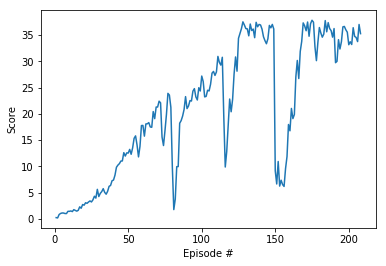

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
print(agent.actor_target)
print(agent.critic_target)

Actor(
  (fc1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=4, bias=True)
)
Critic(
  (fcs1): Linear(in_features=33, out_features=256, bias=True)
  (fc2): Linear(in_features=260, out_features=256, bias=True)
  (fc3): Linear(in_features=256, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=1, bias=True)
)


### 4.6 Close the environment

In [11]:
env.close()